In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 10491, done.
remote: Total 10491 (delta 0), reused 0 (delta 0), pack-reused 10491
Receiving objects: 100% (10491/10491), 10.65 MiB | 26.93 MiB/s, done.
Resolving deltas: 100% (7254/7254), done.


In [ ]:
%cd yolov5/

/content/yolov5/yolov5


In [ ]:
!pip install -U -r requirements.txt

In [ ]:
!python detect.py --source ./data/images/zidane.jpg --weights yolov5s.pt --conf 0.4

detect: weights=['yolov5s.pt'], source=./data/images/zidane.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-185-g9b13a59 torch 1.10.1+cu102 CPU

100% 14.0M/14.0M [00:00<00:00, 118MB/s] 

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/yolov5/yolov5/data/images/zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.270s)
Speed: 2.7ms pre-process, 269.9ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


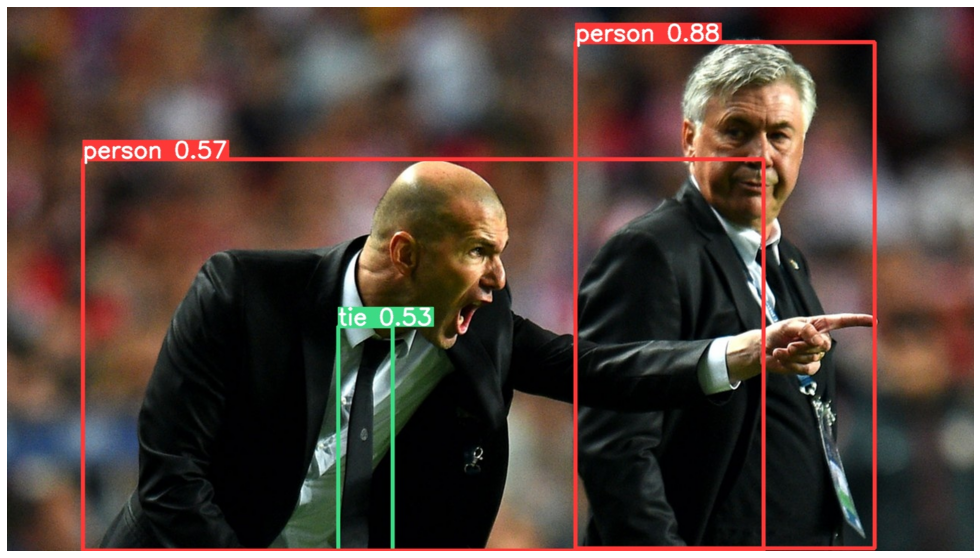

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("/content/yolov5/runs/detect/exp/zidane.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
!python detect.py --source data/videos/new_york_taxi_cabs_street_traffic_438.mp4 --weights yolov5s.pt --conf 0.4

detect: weights=['yolov5s.pt'], source=data/videos/new_york_taxi_cabs_street_traffic_438.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-185-g9b13a59 torch 1.10.1+cu102 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Traceback (most recent call last):
  File "detect.py", line 257, in <module>
    main(opt)
  File "detect.py", line 252, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/grad_mode.py", line 28, in decorate_context
    return func(*args, **kwargs)
  File "detect.py", line 108, in run
    dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt)

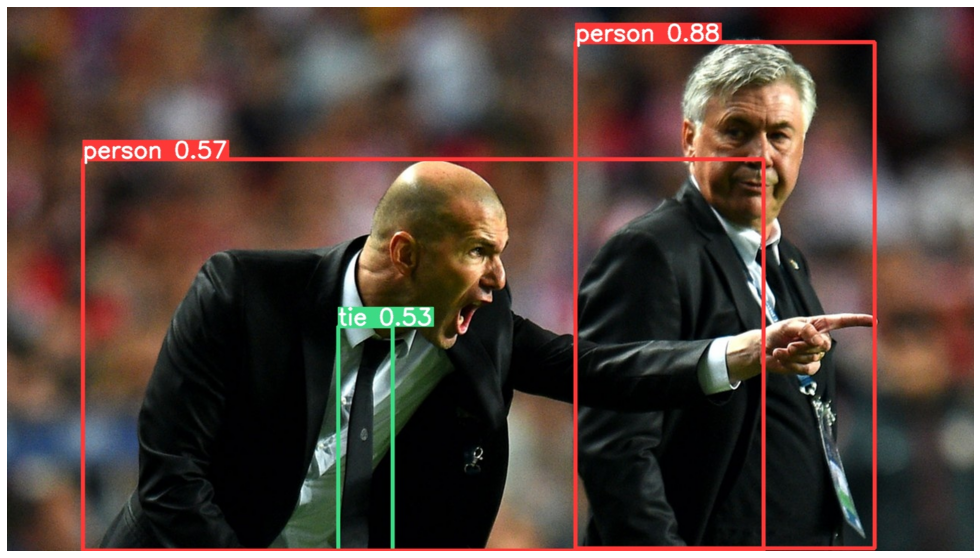

In [ ]:
import cv2
import numpy as np
import os

image_folder = '/content/yolov5/runs/detect/exp2'
video_file = 'new_york_taxi_cabs_street_traffic_438.mp4'
image_size = (160, 120)
fps = 24

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]
images.sort()

out = cv2.VideoWriter(video_file, cv2.VideoWriter_fourcc(*'MP4V'), fps, image_size)

img_array = []
for filename in images:
    img = cv2.imread(os.path.join(image_folder, filename))
    img_array.append(img)
    out.write(img)

out.release()
fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture('/content/yolov5/runs/detect/exp2/new_york_taxi_cabs_street_traffic_438.mp4')

while(cap.isOpened()):
    ret, frame = cap.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()